In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import np_utils
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from tensorflow.keras import datasets   
from tensorflow.keras import optimizers
from sklearn.metrics import recall_score
from pandas.plotting import scatter_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [157]:
DIR='./default of credit card clients.xls'

In [158]:
FILE=pd.read_excel(DIR, skiprows=1)

In [159]:
df=FILE
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [160]:
df = df.iloc[0:, 1:]

In [161]:
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [162]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [163]:
df.rename(columns = {'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)
df.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [164]:
data = df.drop('default',axis=1)
target = df['default']

In [165]:
scaler=StandardScaler()
scaler.fit(data)
data_scaled=scaler.transform(data)

## PCA 주성분 분석

In [166]:
pca=PCA()

In [167]:
pca.fit(data_scaled)

PCA()

In [168]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1

print(f'주성분 갯수(차원): {d}')

주성분 갯수(차원): 15


In [170]:
pca=PCA(n_components=d)

In [171]:
pca.fit(data_scaled)

PCA(n_components=15)

In [172]:
dfPCA=pca.transform(data_scaled)

In [174]:
dfPCA.shape

(30000, 15)

In [176]:
dfPCA[:5]

array([[-1.88796243, -0.90610864, -0.48779485, -0.54001512,  0.99795729,
         0.0444039 , -0.6236867 ,  0.11279385, -0.18989407, -0.08460241,
         0.24536379,  3.26440454, -1.04859065, -0.31852526, -0.19742516],
       [-0.76469577, -2.10928757,  1.0973135 , -0.48347978,  0.85898024,
        -0.23509848,  0.06474193,  0.09359506, -0.15369954,  0.12403462,
         0.14171121, -0.88185464,  0.07816213, -0.27330449,  0.43800749],
       [-0.8474079 , -1.07217896,  0.4121783 , -0.4335639 ,  0.77049273,
         0.01866504, -0.15047242, -0.09188369, -0.15617916,  0.08917074,
         0.04622218, -0.27301229,  0.51995332,  0.33860313,  0.01437861],
       [-0.1965886 , -0.80902155, -0.81864236,  0.29287825,  0.90936607,
        -0.28464494,  0.23522086, -0.06298424,  0.11461239, -0.06700726,
         0.02131769,  0.03954459, -0.71191663,  0.50435361,  0.05611552],
       [-0.84093409, -0.07253802, -1.00525746,  2.3280133 , -1.02312379,
         0.79433025,  0.71106909,  0.12419084, 

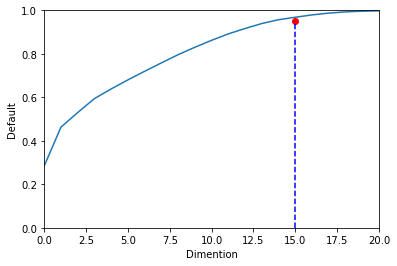

In [185]:
## 주성분과 데이터 투영 분산 정도 시각화
plt.plot(cumsum)
plt.plot(d, 0.95, 'ro')
plt.plot([15, 15], [0, 0.95], 'b--')
plt.axis([0, 20, 0, 1])
plt.xlabel("Dimention")
plt.ylabel("Default")
plt.show()

In [194]:
# 훈련/테스트 데이터 나누기
x_train, x_test, y_train, y_test = train_test_split(dfPCA, target,
                                                    random_state=42,
                                                    stratify=target)

In [202]:
model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=(15,)))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(70, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [203]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [206]:
hist = model.fit(x_train, y_train, epochs=50,batch_size=200,
                    validation_data = (x_test, y_test))

Epoch 1/50
113/113 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8284 - val_loss: 0.4464 - val_accuracy: 0.8141
Epoch 2/50
113/113 [==============================] - 0s 2ms/step - loss: 0.4005 - accuracy: 0.8286 - val_loss: 0.4479 - val_accuracy: 0.8149
Epoch 3/50
113/113 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8298 - val_loss: 0.4455 - val_accuracy: 0.8100
Epoch 4/50
113/113 [==============================] - 0s 2ms/step - loss: 0.3990 - accuracy: 0.8301 - val_loss: 0.4535 - val_accuracy: 0.8109
Epoch 5/50
113/113 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.8300 - val_loss: 0.4527 - val_accuracy: 0.8047
Epoch 6/50
113/113 [==============================] - 0s 2ms/step - loss: 0.3961 - accuracy: 0.8314 - val_loss: 0.4502 - val_accuracy: 0.8105
Epoch 7/50
113/113 [==============================] - 0s 2ms/step - loss: 0.3942 - accuracy: 0.8330 - val_loss: 0.4518 - val_accuracy: 0.8079
Epoch 

In [186]:
# https://www.kaggle.com/code/jinameliachoi/tutorial-pca-default-of-credit-card-clients

In [205]:
# https://hong-zone17.tistory.com/76